In [ ]:
# Library untuk data preprocessing dan Implementasi model
import pandas as pd
import numpy as np
from google.colab import drive

# Library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Library untuk algoritma K-Means dan DBSCAN5
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors

# Library untuk evaluasi
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Library untuk penyimpanan data
import json
import time

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Membaca Data CSV
file_path = '/content/drive/My Drive/data_gempa.csv'
df = pd.read_csv(file_path)

# Data Cleaning
df = df.dropna()
df = df[(df['Latitude'] >= -11.13) & (df['Latitude'] <= 6) &
        (df['Longitude'] >= 94.75) & (df['Longitude'] <= 141)]

keywords = ["Philippine", "Malay", "Timor", "Micronesia", "Indian", "China", "Arafura"]
df = df[~df['Location'].str.contains('|'.join(keywords), case=False, na=False)]

print("Data setelah dibersihkan:")
print(df.head())

# Pemilihan Atribut
df_selected = df[['Latitude', 'Longitude', 'Depth (km)', 'Magnitude']]
df_selected = df_selected.rename(columns={'Depth (km)': 'Depth'})

print("\nData setelah pemilihan Atribut:")
print(df_selected.head())

# Normalisasi Data
df_normalisasi = pd.DataFrame(df_selected[['Latitude', 'Longitude', 'Depth', 'Magnitude']])

def min_max_normalize(column):
    return (column - column.min()) / (column.max() - column.min())

df_normalized = df_normalisasi.apply(min_max_normalize)
df_normalized = df_normalized.round(3)

print("\nData setelah normalisasi:")
print(df_normalized.head())

# Transformasi Data
df_normalized = df_normalized.astype({'Latitude': 'float32',
                                      'Longitude': 'float32',
                                      'Depth': 'float32',
                                      'Magnitude': 'float32'})

print("\nInformasi data setelah transformasi:")
df_normalized.info()
print("\nSampel data setelah transformasi:")
print(df_normalized.head())

# Simpan hasil preprocessing
output_path = '/content/drive/My Drive/pre_processed_gempa.csv'
df_normalized.to_csv(output_path, index=False)

print(f"Data yang telah dipreprocessing disimpan di: {output_path}")

Mounted at /content/drive
Data setelah dibersihkan:
   No     Event ID                    Date time  Latitude   Longitude  \
0   1  bmg2014aagp  2014-01-01T03:20:13.703723Z -6.992058  127.706222   
1   2  bmg2014aain  2014-01-01T04:18:04.916949Z  3.445683  126.936745   
2   3  bmg2014aajt   2014-01-01T04:55:27.58844Z  3.891095  126.744156   
3   4  bmg2014aaoj  2014-01-01T07:15:00.200751Z -0.072344  123.316055   
4   5  bmg2014aavi  2014-01-01T10:46:35.118054Z -8.468179  112.404167   

   Magnitude Mag Type  Depth (km)  Phase Count  Azimuth Gap  \
0   4.227720       mb         252           23    59.657278   
1   4.059405      MLv          10            9   177.421173   
2   4.070687      MLv          32           13   168.795090   
3   3.761002      MLv         119           13   168.393341   
4   3.162218      MLv          87           17   192.326927   

                        Location Agency  
0                      Banda Sea    BMG  
1      Talaud Islands, Indonesia    BMG  
2   

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
K=2, WCSS=1189.3143, Silhouette Score=0.4812
K=3, WCSS=721.9549, Silhouette Score=0.4725
K=4, WCSS=512.7102, Silhouette Score=0.4910
K=5, WCSS=378.7579, Silhouette Score=0.4406
K=6, WCSS=307.3608, Silhouette Score=0.4593
K=7, WCSS=259.4852, Silhouette Score=0.4301
K=8, WCSS=224.9040, Silhouette Score=0.4349
K=9, WCSS=198.7979, Silhouette Score=0.4185
K=10, WCSS=180.4976, Silhouette Score=0.4199
K=11, WCSS=162.5623, Silhouette Score=0.4292
K=12, WCSS=147.4629, Silhouette Score=0.4117
K=13, WCSS=138.0085, Silhouette Score=0.4132
K=14, WCSS=128.9008, Silhouette Score=0.3977
K=15, WCSS=120.2402, Silhouette Score=0.3965
K=16, WCSS=112.4512, Silhouette Score=0.3991
K=17, WCSS=105.9344, Silhouette Score=0.4015
K=18, WCSS=100.2149, Silhouette Score=0.4071
K=19, WCSS=94.6561, Silhouette Score=0.4111
K=20, WCSS=89.2375, Silhouette Score=0.3928


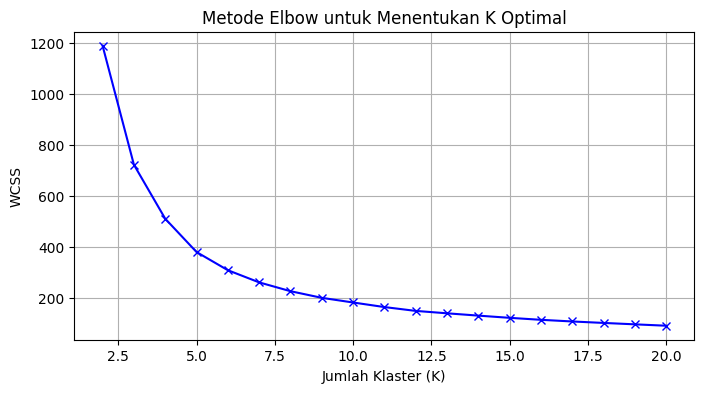

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Membaca data yang telah dipreprocessing
file_path = '/content/drive/My Drive/pre_processed_gempa.csv'
df_normalized = pd.read_csv(file_path)

# Menentukan Jumlah K Paling Optimal
data = df_normalized[['Depth', 'Magnitude']].values
wcss = []
silhouette_scores = []

# Uji nilai K dari 2 hingga 20
K_range = range(2, 21)
for k in K_range:
    kmeans = KMeans(n_clusters=k, max_iter=300, random_state=0, n_init=10)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    score = silhouette_score(data, kmeans.labels_)
    print(f"K={k}, WCSS={kmeans.inertia_:.4f}, Silhouette Score={score:.4f}")

# Plot Elbow (WCSS)
plt.figure(figsize=(8, 4))
plt.plot(K_range, wcss, 'bx-')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('WCSS')
plt.title('Metode Elbow untuk Menentukan K Optimal')
plt.grid(True)
plt.show()


--- Iteration 1/70 ---
Sigma = 0.4726
  Sol 1/20: SSE=2014.72
  Sol 2/20: SSE=1049.69
  Sol 3/20: SSE=1146.71
  Sol 4/20: SSE=1416.89
  Sol 5/20: SSE=1185.21
  Sol 6/20: SSE=1284.46
  Sol 7/20: SSE=1076.19
  Sol 8/20: SSE=1072.36
  Sol 9/20: SSE=1357.23
  Sol 10/20: SSE=1729.17
  Sol 11/20: SSE=982.81
  Sol 12/20: SSE=1086.71
  Sol 13/20: SSE=1274.13
  Sol 14/20: SSE=1427.97
  Sol 15/20: SSE=1347.93
  Sol 16/20: SSE=2156.13
  Sol 17/20: SSE=1065.90
  Sol 18/20: SSE=940.99
  Sol 19/20: SSE=1443.44
  Sol 20/20: SSE=1672.32
  >> New best: SSE=940.99, DBI=2.2767, Silhouette=0.3928
Population size for next iter: 40

--- Iteration 2/70 ---
Sigma = 0.4464
  Sol 1/40: SSE=940.99
  Sol 2/40: SSE=2397.11
  Sol 3/40: SSE=10808.85
  Sol 4/40: SSE=1905.61
  Sol 5/40: SSE=3842.34
  Sol 6/40: SSE=1129.05
  Sol 7/40: SSE=11516.71
  Sol 8/40: SSE=2361.76
  Sol 9/40: SSE=1640.77
  Sol 10/40: SSE=7458.45
  Sol 11/40: SSE=9634.52
  Sol 12/40: SSE=2063.84
  Sol 13/40: SSE=1505.04
  Sol 14/40: SSE=2897.45


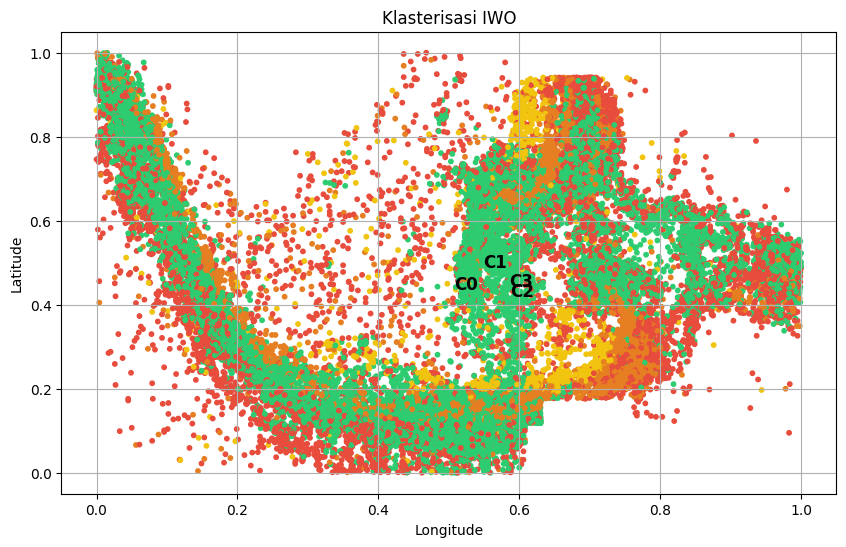

In [ ]:
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def calculate_sse(data, centroids, labels):
    return sum(euclidean_distance(data[i], centroids[labels[i]]) ** 2 for i in range(len(data)))

def calculate_dbi(data, centroids, labels, n_clusters):
    sigmas = np.zeros(n_clusters)
    for i in range(n_clusters):
        cluster_data = data[labels == i]
        if len(cluster_data) > 0:
            sigmas[i] = np.mean([euclidean_distance(x, centroids[i]) for x in cluster_data])

    dbi = 0
    for i in range(n_clusters):
        max_ratio = 0
        for j in range(n_clusters):
            if i != j:
                dist = euclidean_distance(centroids[i], centroids[j])
                if dist > 0:
                    ratio = (sigmas[i] + sigmas[j]) / dist
                    max_ratio = max(max_ratio, ratio)
        dbi += max_ratio
    return dbi / n_clusters

# IWO Algorithm
def iwo_clustering(data, n_clusters, max_iter=70, pop_size=20, max_pop=40,
                   max_seeds=20, min_seeds=5, sigma_initial=0.5, sigma_final=0.01,
                   nonlinear_index=4):
    n_samples, n_features = data.shape
    population = []

    # Tahap 1: Inisialisasi Populasi
    for _ in range(pop_size):
        idx = np.random.choice(n_samples, n_clusters, replace=False)
        centroids = data[idx].copy()
        population.append(centroids)

    best_solution, best_labels = None, None
    best_fitness = float('inf')
    best_dbi, best_sil = None, None

    for iter_num in range(1, max_iter+1):
        print(f"\n--- Iteration {iter_num}/{max_iter} ---")
        sigma = ((max_iter - iter_num) ** nonlinear_index / (max_iter ** nonlinear_index)) * (sigma_initial - sigma_final) + sigma_final
        print(f"Sigma = {sigma:.4f}")

        fitness_list, labels_list = [], []
        # Tahap 2: Menentukan Anggota Dari Tiap Gulma Induk
        for idx, centroids in enumerate(population, 1):
            labels = np.array([np.argmin([euclidean_distance(x, c) for c in centroids]) for x in data])
            sse = calculate_sse(data, centroids, labels)
            print(f"  Sol {idx}/{len(population)}: SSE={sse:.2f}")
            fitness_list.append(sse)
            labels_list.append(labels)

        # Mengurutkan populasi berdasarkan fitness
        combined = sorted(zip(population, fitness_list, labels_list), key=lambda x: x[1])
        population = [x[0] for x in combined[:max_pop]]
        fitness_list = [x[1] for x in combined[:max_pop]]
        labels_list = [x[2] for x in combined[:max_pop]]

        #  Menyimpan solusi terbaik
        if fitness_list[0] < best_fitness:
            best_fitness = fitness_list[0]
            best_solution = population[0].copy()
            best_labels = labels_list[0].copy()
            try:
                best_dbi = calculate_dbi(data, best_solution, best_labels, n_clusters)
                best_sil = silhouette_score(data, best_labels) if len(set(best_labels)) > 1 else -1
            except:
                best_dbi, best_sil = float('inf'), -1
            print(f"  >> New best: SSE={best_fitness:.2f}, DBI={best_dbi:.4f}, Silhouette={best_sil:.4f}")

        # Tahap 3: Menghasilkan Gulma Anak dan Daerah Penyebarannya
        new_pop = [best_solution.copy()]
        fit_min, fit_max = min(fitness_list), max(fitness_list)
        for sol, fit in zip(population, fitness_list):
            # Menentukan jumlah benih berdasarkan fitness
            if fit_max == fit_min:
                seeds = max_seeds
            else:
                # Menghasilkan Gulma Anak dan Daerah Penyebarannya
                seeds = int(min_seeds + (max_seeds - min_seeds) * (fit_max - fit) / (fit_max - fit_min))
            # Tahap 4: Memilih Kombinasi Calon Gulma
            for _ in range(seeds):
                if len(new_pop) >= max_pop:
                    break
                # Mutasi: menambahkan noise berdasarkan distribusi normal
                child = sol + np.random.normal(0, sigma, sol.shape)
                new_pop.append(np.clip(child, 0, 1))

        # Tahap 5: Menentukan Anggota Dari Tiap Gulma pada Tiap Koloni Gulma
        population = new_pop[:max_pop]
        print(f"Population size for next iter: {len(population)}")

    # Tahap 6: Penentuan Koloni Gulma yang Mempunyai Nilai Best Fitness
    return best_solution, best_labels, best_fitness, best_dbi, best_sil

# Eksekusi IWO
np.random.seed(42)
# Load data
df_normalized = pd.read_csv("/content/drive/My Drive/pre_processed_gempa.csv")
df_normalized['No'] = np.arange(1, len(df_normalized)+1)

# Mendefinisikan atribut untuk klasterisasi
features = ['Depth', 'Magnitude']
n_clusters = 4

# Menjalankan klasterisasi
start = time.time()
X = df_normalized[features].values
centroids, labels, sse, dbi, sil = iwo_clustering(X, n_clusters=n_clusters)
elapsed = time.time() - start

# Assign klaster ke dataframe
df_normalized['Cluster'] = labels

# Menampilkan hasil akhir
print(f"\nIWO Clustering completed in {elapsed:.2f} seconds")

# CLUSTER STATISTICS
print("\n--- CLUSTER STATISTICS ---")
print("Cluster Statistics:")
cluster_stat = df_normalized['Cluster'].value_counts().sort_index().reset_index()
cluster_stat.columns = ['Cluster', 'Size']
cluster_stat['Size_Percent'] = (cluster_stat['Size'] / len(df_normalized) * 100)
print(cluster_stat.to_string(index=False))

# EVALUASI MODEL
print("\n--- EVALUASI MODEL ---")
print("Algorithm : IWO")
print(f"SSE: {sse:.6f}")
print(f"Davies-Bouldin Index: {dbi:.6f}")
print(f"Silhouette Score: {sil:.6f}")


# ASSIGN HASIL KLASTER
print("\n--- ASSIGN HASIL KLASTER ---")

# Sample data hasil clustering
print("Sample data hasil clustering:")
sample_df = df_normalized[['Latitude', 'Longitude', 'Depth', 'Magnitude', 'No', 'Cluster']].head()
print(sample_df.to_string(index=True))

# Menghitung centroid
print("\nCentroid masing-masing klaster:")

centroid_data = []
for i in range(n_clusters):
    cluster_data = df_normalized[df_normalized['Cluster'] == i]

    lat_mean = cluster_data['Latitude'].mean()
    lon_mean = cluster_data['Longitude'].mean()

    depth = centroids[i][0]
    magnitude = centroids[i][1]

    centroid_data.append({
        'Latitude': lat_mean,
        'Longitude': lon_mean,
        'Depth': depth,
        'Magnitude': magnitude,
        'Cluster': i
    })

centroid_df = pd.DataFrame(centroid_data)
print(centroid_df.to_string(index=False))

# Statistic detail per klaster
print("\nStatistik per klaster:")
clusters = sorted(df_normalized['Cluster'].unique())
all_features = ['Latitude', 'Longitude', 'Depth', 'Magnitude']

for cluster in clusters:
    cluster_data = df_normalized[df_normalized['Cluster'] == cluster]
    size = len(cluster_data)
    percentage = size / len(df_normalized) * 100
    print(f"Cluster {cluster} (n={size}, {percentage:.2f}%):", end=" ")

    for feature in all_features:
        min_val = cluster_data[feature].min()
        mean_val = cluster_data[feature].mean()
        max_val = cluster_data[feature].max()
        print(f"{feature}: min={min_val:.4f}, mean={mean_val:.4f}, max={max_val:.4f}", end=" ")
    print()

# Simpan hasil ke CSV
df_normalized.to_csv("/content/drive/My Drive/klasterisasi_iwo_skripsi.csv", index=False)

# Create JSON for simulation feature
model_data = {
    "centroids": [
        {
            "cluster": int(row["Cluster"]),
            "latitude": float(row["Latitude"]),
            "longitude": float(row["Longitude"]),
            "depth": float(row["Depth"]),
            "magnitude": float(row["Magnitude"])
        } for _, row in centroid_df.iterrows()
    ],
    "metrics": {
        "sse": float(sse),
        "dbi": float(dbi),
        "silhouette": float(sil)
    },
    "cluster_stats": [
        {
            "cluster": int(cluster),
            "size": int(len(cluster_data)),
            "size_percent": float(len(cluster_data)/len(df_normalized)*100),
            "latitude": {
                "min": float(cluster_data["Latitude"].min()),
                "max": float(cluster_data["Latitude"].max()),
                "mean": float(cluster_data["Latitude"].mean())
            },
            "longitude": {
                "min": float(cluster_data["Longitude"].min()),
                "max": float(cluster_data["Longitude"].max()),
                "mean": float(cluster_data["Longitude"].mean())
            },
            "depth": {
                "min": float(cluster_data["Depth"].min()),
                "max": float(cluster_data["Depth"].max()),
                "mean": float(cluster_data["Depth"].mean())
            },
            "magnitude": {
                "min": float(cluster_data["Magnitude"].min()),
                "max": float(cluster_data["Magnitude"].max()),
                "mean": float(cluster_data["Magnitude"].mean())
            }
        } for cluster in clusters for cluster_data in [df_normalized[df_normalized["Cluster"] == cluster]]
    ],
    "cluster_counts": {
        "total": len(df_normalized),
        "by_cluster": [int(cluster_stat[cluster_stat["Cluster"] == i]["Size"].values[0]) for i in range(n_clusters)]
    },
    "normalization": {
        "latitude": {"min": -11.0, "max": 6.0},
        "longitude": {"min": 95.0, "max": 141.0},
        "depth": {"min": 1.0, "max": 750.0},
        "magnitude": {"min": 0.99, "max": 7.89}
    }
}

# Save JSON
with open('/content/drive/My Drive/klasterisasi_iwo_skripsi.json', 'w') as f:
    json.dump(model_data, f, indent=2)

# Hasil Visualisasi
plt.figure(figsize=(10,6))
cmap = ListedColormap(['#2ECC71', '#E74C3C', '#F1C40F', '#E67E22'])
plt.scatter(df_normalized['Longitude'], df_normalized['Latitude'], c=df_normalized['Cluster'], cmap=cmap, s=10)
for i, c in enumerate(centroid_data):
    plt.annotate(f"C{i}", (c['Longitude'], c['Latitude']), fontsize=12, fontweight='bold')
plt.title('Klasterisasi IWO')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

Loading data from /content/drive/My Drive/pre_processed_gempa.csv...
Dataset memiliki 81454 data points

--- MODEL KMEANS ---
Model K-means dengan 4 cluster berhasil dibuat

--- CLUSTER STATISTICS ---
Cluster Statistics:
   Cluster   Size  Size_Percent
0        0  24493     30.069733
1        1   1406      1.726128
2        2  10432     12.807229
3        3  45123     55.396911

--- EVALUASI MODEL ---

Evaluasi Model:
  Algorithm         SSE  Davies-Bouldin Index  Silhouette Score
0   K-Means  512.710156              0.734879          0.491029

--- ASSIGN HASIL KLASTER ---
Sample data hasil clustering:
   Latitude  Longitude  Depth  Magnitude  Cluster
0     0.236      0.711  0.335      0.469        2
1     0.850      0.694  0.012      0.444        0
2     0.876      0.690  0.041      0.446        0
3     0.643      0.616  0.158      0.401        2
4     0.149      0.378  0.115      0.314        3

Centroid masing-masing klaster:
            Depth  Magnitude
Cluster                     

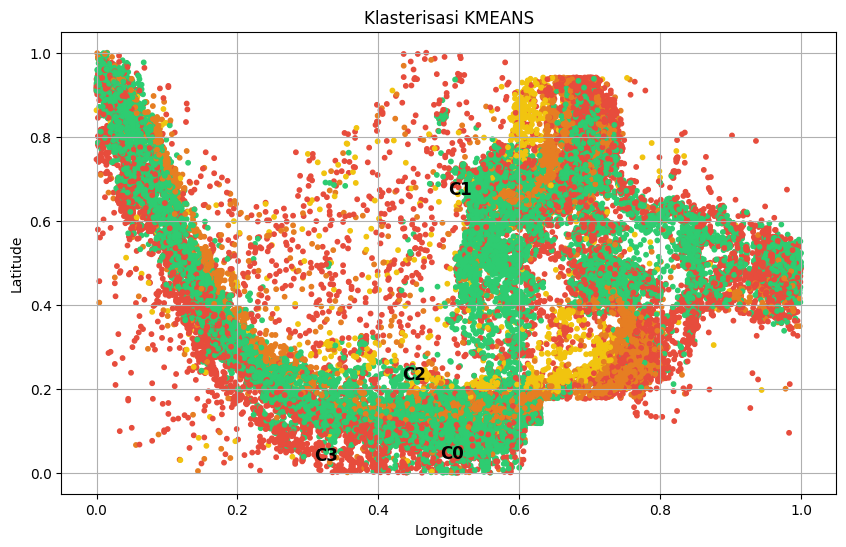


Hasil clustering disimpan di: /content/drive/My Drive/klasterisasi_kmeans_skripsi.csv


In [ ]:
# Load dataset
file_path = '/content/drive/My Drive/pre_processed_gempa.csv'
print(f"Loading data from {file_path}...")
df = pd.read_csv(file_path)

print(f"Dataset memiliki {len(df)} data points")

# MODEL KMEANS
print("\n--- MODEL KMEANS ---")

X = df[['Depth', 'Magnitude']].values
n_clusters = 4

# Membuat dan melatih model K-means
kmeans_model = KMeans(n_clusters=n_clusters,
                      init='k-means++',
                      max_iter=300,
                      n_init=10,
                      random_state=0)
y_pred = kmeans_model.fit_predict(X)
centroids = kmeans_model.cluster_centers_

print(f"Model K-means dengan {n_clusters} cluster berhasil dibuat")

# CLUSTER STATISTICS
print("\n--- CLUSTER STATISTICS ---")

# Menghitung jumlah data dan persentase untuk setiap cluster
cluster_counts = np.bincount(y_pred)
cluster_percentages = cluster_counts / len(y_pred) * 100

# Buat DataFrame untuk statistik cluster
cluster_stats = pd.DataFrame({
    'Cluster': np.arange(n_clusters),
    'Size': cluster_counts,
    'Size_Percent': cluster_percentages
})

print("Cluster Statistics:")
print(cluster_stats)

# EVALUASI
print("\n--- EVALUASI MODEL ---")
# Sum of Squared Errors (SSE)
sse = kmeans_model.inertia_

# Davies-Bouldin Index
dbi = davies_bouldin_score(X, y_pred)

# Silhouette Score
silhouette = silhouette_score(X, y_pred)

# Buat DataFrame untuk evaluasi metrics
eval_metrics = pd.DataFrame({
    'Algorithm': ['K-Means'],
    'SSE': [sse],
    'Davies-Bouldin Index': [dbi],
    'Silhouette Score': [silhouette]
})

print("\nEvaluasi Model:")
print(eval_metrics)

# ASSIGN HASIL KLASTER
print("\n--- ASSIGN HASIL KLASTER ---")
# Tambahkan label klaster ke dataframe
df['Cluster'] = y_pred

# Tampilkan beberapa data hasil clustering
print("Sample data hasil clustering:")
print(df.head())

# Tampilkan centroid masing-masing klaster
centroids_df = pd.DataFrame(centroids, columns=['Depth', 'Magnitude'])
centroids_df.index.name = 'Cluster'
print("\nCentroid masing-masing klaster:")
print(centroids_df)

# Hitung statistik untuk masing-masing klaster
print("\nStatistik per klaster:")
for i in range(n_clusters):
    cluster_data = df[df['Cluster'] == i]
    percent = len(cluster_data) / len(df) * 100

    print(f"\nCluster {i} (n={len(cluster_data)}, {percent:.2f}%):")
    print(f"  Latitude: min={cluster_data['Latitude'].min():.4f}, mean={cluster_data['Latitude'].mean():.4f}, max={cluster_data['Latitude'].max():.4f}")
    print(f"  Longitude: min={cluster_data['Longitude'].min():.4f}, mean={cluster_data['Longitude'].mean():.4f}, max={cluster_data['Longitude'].max():.4f}")
    print(f"  Depth: min={cluster_data['Depth'].min():.4f}, mean={cluster_data['Depth'].mean():.4f}, max={cluster_data['Depth'].max():.4f}")
    print(f"  Magnitude: min={cluster_data['Magnitude'].min():.4f}, mean={cluster_data['Magnitude'].mean():.4f}, max={cluster_data['Magnitude'].max():.4f}")


# VISUALISASI HASIL KLASTER
print("\n--- VISUALISASI HASIL KLASTER ---")

# Visualisasi spasial (long-lat) menyerupai kode IWO
plt.figure(figsize=(10, 6))
cmap = ListedColormap(['#E74C3C', '#F1C40F', '#E67E22', '#2ECC71'])

# Plot semua titik data dengan warna berdasarkan klaster
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap=cmap, s=10)

# Tambahkan anotasi untuk centroid
for i in range(n_clusters):
    plt.annotate(f"C{i}",
                 (centroids[i, 1], centroids[i, 0]),  # Longitude, Latitude
                 fontsize=12,
                 fontweight='bold')

plt.title('Klasterisasi KMEANS')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.savefig('/content/drive/My Drive/klasterisasi_kmeans_skripsi.png', dpi=300, bbox_inches='tight')
plt.show()

# Simpan hasil clustering ke CSV
output_path = '/content/drive/My Drive/klasterisasi_kmeans_skripsi.csv'
df.to_csv(output_path, index=False)
print(f"\nHasil clustering disimpan di: {output_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading data from /content/drive/My Drive/pre_processed_gempa.csv...
Dataset memiliki 81454 data

--- MODEL DBSCAN ---
Menggunakan 40000 sampel untuk training model DBSCAN
Parameter DBSCAN: eps=0.0325, min_samples=5
Waktu training: 4.21 detik
Jumlah klaster yang terbentuk: 4
Jumlah data noise pada sampel: 64 (0.16%)
Jumlah core samples: 39894

Memproses dataset penuh...
Waktu pemrosesan: 115.64 detik
Jumlah klaster pada dataset penuh: 4
Jumlah data noise pada dataset penuh: 161 (0.20%)

--- EVALUASI MODEL ---
SSE: 1734.8168
Davies-Bouldin Index: 1.3394
Silhouette Score: 0.4161

--- ASSIGN HASIL KLASTER ---
Sample data hasil clustering:
   Latitude  Longitude  Depth  Magnitude  Cluster
0     0.236      0.711  0.335      0.469        0
1     0.850      0.694  0.012      0.444        0
2     0.876      0.690  0.041      0.446        0
3     0.643      0.616  0.1

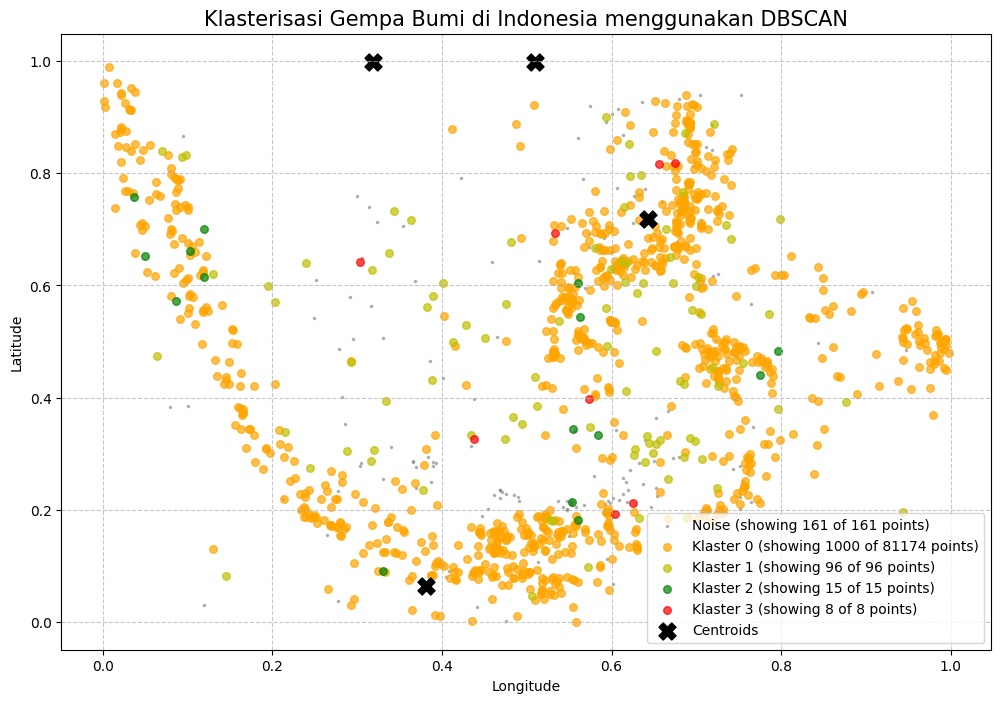


Hasil clustering disimpan di: /content/drive/My Drive/klasterisasi_dbscan_skripsi.csv


In [ ]:
# Model DBSCAN
# Load dataset
file_path = '/content/drive/My Drive/pre_processed_gempa.csv'
print(f"Loading data from {file_path}...")
df = pd.read_csv(file_path)

print(f"Dataset memiliki {len(df)} data")

# MODEL DBSCAN
print("\n--- MODEL DBSCAN ---")

# Menggunakan sampling untuk training model
sample_size = 40000
print(f"Menggunakan {sample_size} sampel untuk training model DBSCAN")

# Sample data untuk training
np.random.seed(42)
features = ['Depth', 'Magnitude']
df_sampled = df.sample(n=min(sample_size, len(df)), random_state=42)
X_sampled = df_sampled[features].values

# Parameter DBSCAN
eps = 0.0325  # Jarak maksimum antara dua sampel untuk dianggap sebagai tetangga
min_samples = 5  # Jumlah minimum sampel dalam neighborhood untuk membentuk core point

print(f"Parameter DBSCAN: eps={eps}, min_samples={min_samples}")

# Membuat dan melatih model DBSCAN pada data sampel
start_time = pd.Timestamp.now()

dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
y_pred_sampled = dbscan_model.fit_predict(X_sampled)

end_time = pd.Timestamp.now()
print(f"Waktu training: {(end_time - start_time).total_seconds():.2f} detik")

# Menghitung jumlah klaster yang terbentuk (tidak termasuk noise)
n_clusters = len(set(y_pred_sampled)) - (1 if -1 in y_pred_sampled else 0)
n_noise = list(y_pred_sampled).count(-1)

print(f"Jumlah klaster yang terbentuk: {n_clusters}")
print(f"Jumlah data noise pada sampel: {n_noise} ({n_noise/len(X_sampled)*100:.2f}%)")

# Identifikasi core samples dan labels
core_samples_mask = np.zeros_like(y_pred_sampled, dtype=bool)
core_samples_mask[dbscan_model.core_sample_indices_] = True
core_samples = X_sampled[core_samples_mask]
core_labels = y_pred_sampled[core_samples_mask]

print(f"Jumlah core samples: {len(core_samples)}")

# Function untuk menghitung centroids
def calculate_centroids(data, labels):
    # Jumlah klaster tidak termasuk noise (-1)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    centroids = np.zeros((n_clusters, data.shape[1]))

    # Hitung centroid untuk setiap klaster (tidak termasuk noise)
    for i in range(n_clusters):
        cluster_points = data[labels == i]
        if len(cluster_points) > 0:
            centroids[i] = np.mean(cluster_points, axis=0)

    return centroids

# Hitung centroids dari sampel
centroids = calculate_centroids(X_sampled, y_pred_sampled)

# Proses data penuh menggunakan chunking
print("\nMemproses dataset penuh...")
start_time = pd.Timestamp.now()

chunk_size = 5000
n_chunks = len(df) // chunk_size + 1
all_labels = np.full(len(df), -1)  # Default semua noise

for i in range(n_chunks):
    start_idx = i * chunk_size
    end_idx = min((i + 1) * chunk_size, len(df))
    chunk_data = df.iloc[start_idx:end_idx][features].values

    print(f"Memproses chunk {i+1}/{n_chunks} (data {start_idx+1}-{end_idx})...", end='\r')
    # Untuk setiap titik dalam chunk, cari klaster terdekat dari model yang sudah ditraining
    for j, point in enumerate(chunk_data):
        if len(core_samples) == 0:
            continue

        # Hitung jarak ke semua core samples
        distances = np.sqrt(np.sum((core_samples - point)**2, axis=1))

        # Jika core sample terdekat berada dalam jangkauan eps, assign labelnya
        min_distance = np.min(distances)
        if min_distance <= eps:
            min_idx = np.argmin(distances)
            all_labels[start_idx + j] = core_labels[min_idx]

end_time = pd.Timestamp.now()
print(f"Waktu pemrosesan: {(end_time - start_time).total_seconds():.2f} detik")

# Assign hasil prediksi ke dataframe
df['Cluster'] = all_labels

# Hitung statistik hasil clustering
final_n_clusters = len(set(all_labels)) - (1 if -1 in all_labels else 0)
final_n_noise = list(all_labels).count(-1)

print(f"Jumlah klaster pada dataset penuh: {final_n_clusters}")
print(f"Jumlah data noise pada dataset penuh: {final_n_noise} ({final_n_noise/len(df)*100:.2f}%)")

# EVALUASI
print("\n--- EVALUASI MODEL ---")

# Function untuk menghitung SSE pada DBSCAN untuk seluruh dataset
def calculate_sse_dbscan_full(data, labels, centroids):
    sse = 0

    # Hitung SSE untuk data non-noise
    for i in range(len(data)):
        if labels[i] != -1:  # Abaikan noise points
            # Hitung jarak Euclidean kuadrat ke centroid klaster
            cluster_center = centroids[labels[i]]
            sse += np.sum((data[i] - cluster_center) ** 2)

    return sse

# Hitung SSE pada seluruh dataset
sse = sse = calculate_sse_dbscan_full(df[features].values, df['Cluster'].values, centroids)
print(f"SSE: {sse:.4f}")

# Davies-Bouldin Index dan Silhouette Score dihitung pada seluruh dataset non-noise
if final_n_clusters >= 2:
    # Filter hanya data non-noise untuk seluruh dataset
    X_full = df.iloc[:, :4].values
    full_labels = df['Cluster'].values

    full_filtered = X_full[full_labels != -1]
    full_labels_filtered = full_labels[full_labels != -1]

    if len(full_filtered) > 0 and len(set(full_labels_filtered)) >= 2:
        # Jika dataset sangat besar, ambil sampel yang lebih besar untuk evaluasi
        max_eval_size = 20000 # Ukuran maksimal untuk evaluasi

        if len(full_filtered) > max_eval_size:
            # Random sampling untuk evaluasi
            idx = np.random.choice(len(full_filtered), max_eval_size, replace=False)
            eval_data = full_filtered[idx]
            eval_labels = full_labels_filtered[idx]
        else:
            eval_data = full_filtered
            eval_labels = full_labels_filtered

        # Davies-Bouldin Index
        dbi = davies_bouldin_score(eval_data, eval_labels)
        print(f"Davies-Bouldin Index: {dbi:.4f}")

        # Silhouette Score
        if len(eval_data) > max(10, len(set(eval_labels))):
            silhouette = silhouette_score(eval_data, eval_labels)
            print(f"Silhouette Score: {silhouette:.4f}")
        else:
            print("Silhouette Score: Tidak dapat dihitung (keterbatasan data)")
    else:
        print("Davies-Bouldin Index dan Silhouette Score: Tidak dapat dihitung (tidak cukup data)")
else:
    print("Davies-Bouldin Index dan Silhouette Score: Tidak dapat dihitung (kurang dari 2 klaster)")

# ASSIGN HASIL KLASTER
print("\n--- ASSIGN HASIL KLASTER ---")

# Tampilkan beberapa data hasil clustering
print("Sample data hasil clustering:")
print(df.head())

# Tampilkan statistik jumlah data per klaster
cluster_counts = df['Cluster'].value_counts().sort_index()
print("\nJumlah data per klaster:")
print(cluster_counts)

# Hitung statistik untuk masing-masing klaster
print("\nStatistik per klaster:")
for cluster_id in sorted(df['Cluster'].unique()):
    cluster_name = "Noise" if cluster_id == -1 else f"Cluster {cluster_id}"
    cluster_data = df[df['Cluster'] == cluster_id]
    percent = len(cluster_data) / len(df) * 100

    print(f"\n{cluster_name} (n={len(cluster_data)}, {percent:.2f}%):")
    print(f"  Latitude: min={cluster_data['Latitude'].min():.4f}, mean={cluster_data['Latitude'].mean():.4f}, max={cluster_data['Latitude'].max():.4f}")
    print(f"  Longitude: min={cluster_data['Longitude'].min():.4f}, mean={cluster_data['Longitude'].mean():.4f}, max={cluster_data['Longitude'].max():.4f}")
    print(f"  Depth: min={cluster_data['Depth'].min():.4f}, mean={cluster_data['Depth'].mean():.4f}, max={cluster_data['Depth'].max():.4f}")
    print(f"  Magnitude: min={cluster_data['Magnitude'].min():.4f}, mean={cluster_data['Magnitude'].mean():.4f}, max={cluster_data['Magnitude'].max():.4f}")

# Tampilkan centroid masing-masing klaster (tidak termasuk noise)
if len(centroids) > 0:
    centroids_df = pd.DataFrame(centroids, columns=features)
    centroids_df.index.name = 'Cluster'
    print("\nCentroid masing-masing klaster:")
    print(centroids_df)
else:
    print("\nTidak ada centroid yang dihitung (tidak ada klaster)")

# VISUALISASI HASIL KLASTER
print("\n--- VISUALISASI HASIL KLASTER ---")

# Visualisasi berdasarkan Latitude dan Longitude (lokasi geografis)
plt.figure(figsize=(12, 8))
plt.title('Klasterisasi Gempa Bumi di Indonesia menggunakan DBSCAN', fontsize=15)

# Warna untuk noise cluster
noise_color = 'gray'

# Buat colormap berdasarkan jumlah klaster
colors = ['orange', 'y', 'g', 'r']

# Batasi jumlah titik yang divisualisasikan
max_points_per_cluster = 1000
max_noise_points = 2000

# Plot noise points (sampel jika terlalu banyak)
noise_data = df[df['Cluster'] == -1]
if len(noise_data) > max_noise_points:
    noise_data = noise_data.sample(n=max_noise_points, random_state=42)

if len(noise_data) > 0:
    plt.scatter(
        noise_data['Longitude'],
        noise_data['Latitude'],
        s=10, c=noise_color, marker='.',
        alpha=0.5,
        label=f'Noise (showing {len(noise_data)} of {sum(df["Cluster"] == -1)} points)'
    )

# Plot masing-masing klaster
for i in range(final_n_clusters):
    cluster_data = df[df['Cluster'] == i]
    if len(cluster_data) > max_points_per_cluster:
        cluster_data = cluster_data.sample(n=max_points_per_cluster, random_state=42)

    if len(cluster_data) > 0:
        plt.scatter(
            cluster_data['Longitude'],
            cluster_data['Latitude'],
            s=30, c=colors[i % len(colors)], marker='o',
            alpha=0.7,
            label=f'Klaster {i} (showing {len(cluster_data)} of {sum(df["Cluster"] == i)} points)'
        )

# Jika ada centroid, plot centroids
if len(centroids) > 0:
    plt.scatter(
        centroids[:, 1],  # Longitude coordinate in centroid
        centroids[:, 0],  # Latitude coordinate in centroid
        s=150, marker='X', c='black',
        label='Centroids'
    )

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/content/drive/My Drive/klasterisasi_dbscan_skripsi.png', dpi=300, bbox_inches='tight')
plt.show()

# Simpan hasil clustering ke CSV
output_path = '/content/drive/My Drive/klasterisasi_dbscan_skripsi.csv'
df.to_csv(output_path, index=False)
print(f"\nHasil clustering disimpan di: {output_path}")